In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/gbm/datasetKnnImputterFinal.csv')
df.sample(25)

,Unnamed: 0,Patient_Id,death_days_to,age_at_initial_pathologic_diagnosis,"histoType(0-untreated,1-treated)","radiationTreat (y1,N0)","pharmecTreat(y-1,n-0)","treatmentType(no tre1,radiation-2,pharme-3,theraphy&pharme- 4)","long/short term survivors(short0,long1)","vital_status(live-1,Dead-0)","gender(0M,1F)"
285,285,405,454.0,74,0,1,1,4,0,0,1
526,526,386,343.0,71,0,1,1,4,0,0,0
237,237,532,108.0,72,0,0,0,1,0,0,1
52,52,651,822.0,42,1,1,1,4,1,0,0
452,452,606,1166.8,36,0,1,1,4,1,1,0
369,369,307,68.0,69,0,0,1,3,0,0,0
232,232,143,133.0,65,0,1,1,4,0,0,0
9,9,175,627.0,50,0,1,1,4,1,0,0
140,140,594,378.4,54,0,1,1,4,0,1,0
307,307,343,395.0,49,0,1,1,4,0,0,0


In [ ]:
X = df.drop('long/short term survivors(short0,long1)', axis='columns')
y = df.loc[:, 'long/short term survivors(short0,long1)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
score=model.score(X_test,y_test)
print(score)

0.9236641221374046


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9236641221374046

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        82
           1       0.90      0.90      0.90        49

    accuracy                           0.92       131
   macro avg       0.92      0.92      0.92       131
weighted avg       0.92      0.92      0.92       131



In [ ]:
import tensorflow as tf

Text(95.72222222222221, 0.5, 'Truth')

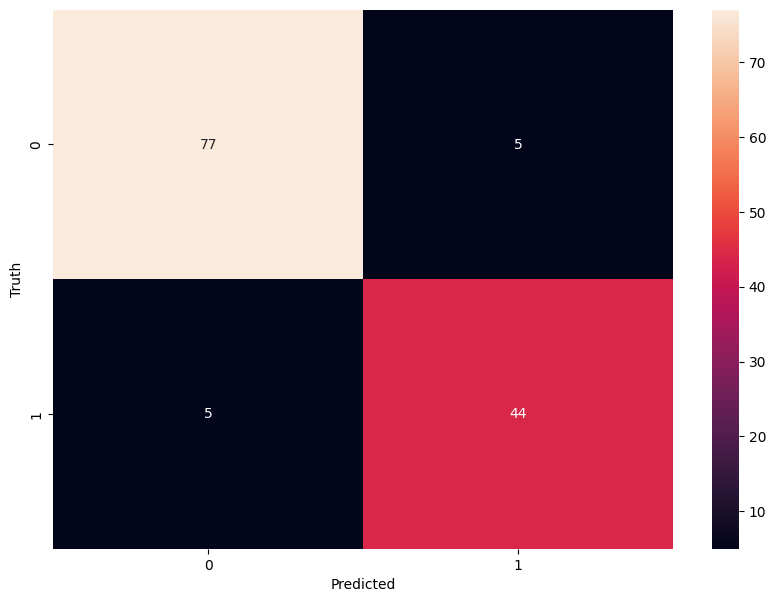

In [ ]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')